In [1]:
# loads black auto-formatting in the notebook. Needs black and nb_black installed via pip
%load_ext lab_black
# Allows for libraries to be reloaded on-the-fly.
%load_ext autoreload
%autoreload 2

# Making blobs

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=1000, centers=20, n_features=2, random_state=0)

In [5]:
x.shape

(1000, 2)

Text(0, 0.5, 'Dimension 2')

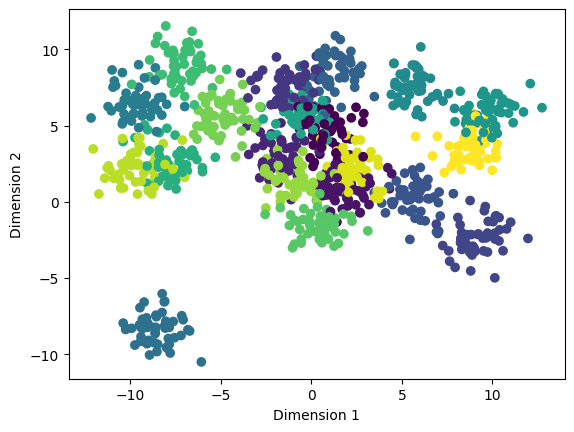

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

In [10]:
df = pd.DataFrame({"x": x[:, 0], "y": x[:, 1], "label": y})

In [11]:
df

,x,y,label
0,-8.962963,8.197543,13
1,0.655970,9.191908,6
2,4.694698,1.362856,5
3,-1.588530,2.810577,2
4,0.062238,5.937650,11
...,...,...,...
995,-10.822254,7.619843,8
996,-7.129125,3.157670,12
997,2.859421,2.956028,0
998,-0.188880,5.204614,0


In [14]:
centers = df.groupby("label")[["x", "y"]].mean().reset_index()

### PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=1)

In [18]:
pca.fit(df[["x", "y"]].values)
_y = pca.transform(df[["x", "y"]].values)
df["pca1"] = _y

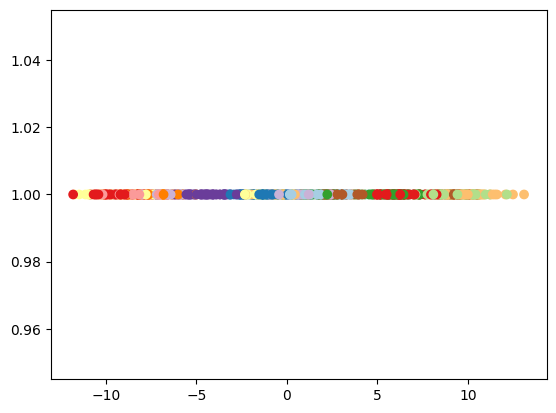

In [29]:
plt.scatter(df["pca1"], df.shape[0] * [1], c=df["label"], cmap="Paired")

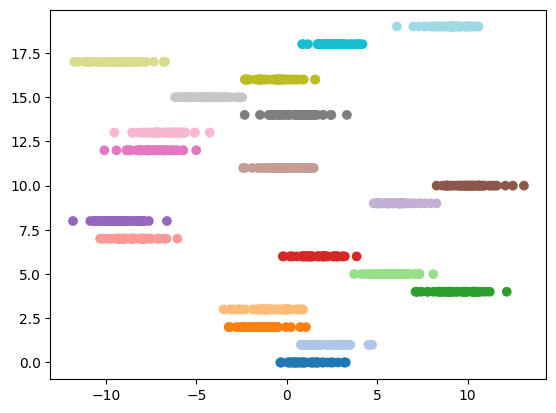

In [31]:
plt.scatter(df["pca1"], df["label"], c=df["label"], cmap="tab20")

## DBSCAN on blobs

In [32]:
from sklearn.cluster import DBSCAN

In [40]:
db_2d = DBSCAN(eps=0.5, min_samples=2).fit(df[["x", "y"]].values)

In [41]:
df["db_2d_label"] = db_2d.labels_

In [42]:
df

,x,y,label,pca1,db_2d_label
0,-8.962963,8.197543,13,-8.547925,0
1,0.655970,9.191908,6,1.089278,1
2,4.694698,1.362856,5,4.967575,-1
3,-1.588530,2.810577,2,-1.284837,1
4,0.062238,5.937650,11,0.429333,1
...,...,...,...,...,...
995,-10.822254,7.619843,8,-10.418606,47
996,-7.129125,3.157670,12,-6.817205,13
997,2.859421,2.956028,0,3.165155,1
998,-0.188880,5.204614,0,0.163324,1


In [44]:
df

,x,y,label,pca1,db_2d_label
0,-8.962963,8.197543,13,-8.547925,0
1,0.655970,9.191908,6,1.089278,1
2,4.694698,1.362856,5,4.967575,-1
3,-1.588530,2.810577,2,-1.284837,1
4,0.062238,5.937650,11,0.429333,1
...,...,...,...,...,...
995,-10.822254,7.619843,8,-10.418606,47
996,-7.129125,3.157670,12,-6.817205,13
997,2.859421,2.956028,0,3.165155,1
998,-0.188880,5.204614,0,0.163324,1


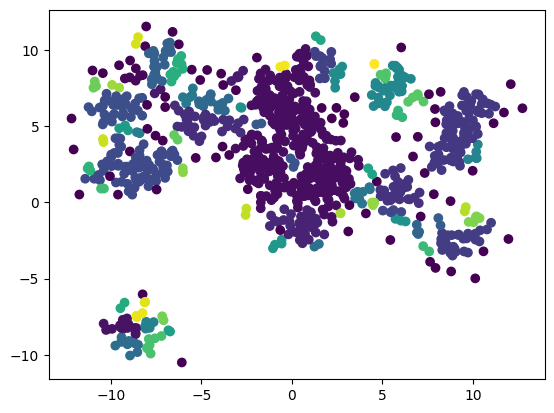

In [45]:
plt.scatter(df["x"], df["y"], c=df["db_2d_label"])

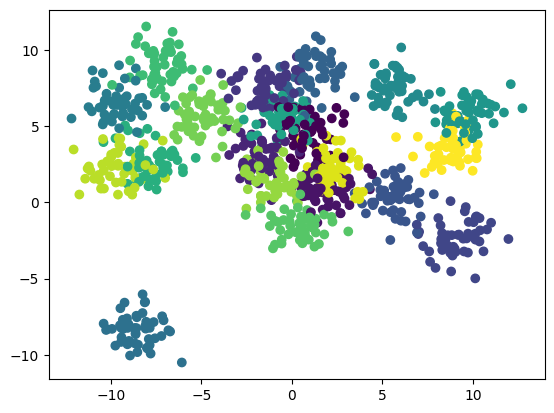

In [46]:
plt.scatter(df["x"], df["y"], c=df["label"])

In [47]:
db_pca = DBSCAN(eps=0.5, min_samples=2).fit(df[["pca1"]].values)

In [49]:
df["db_pca_label"] = db_pca.labels_

In [50]:
df

,x,y,label,pca1,db_2d_label,db_pca_label
0,-8.962963,8.197543,13,-8.547925,0,0
1,0.655970,9.191908,6,1.089278,1,0
2,4.694698,1.362856,5,4.967575,-1,0
3,-1.588530,2.810577,2,-1.284837,1,0
4,0.062238,5.937650,11,0.429333,1,0
...,...,...,...,...,...,...
995,-10.822254,7.619843,8,-10.418606,47,0
996,-7.129125,3.157670,12,-6.817205,13,0
997,2.859421,2.956028,0,3.165155,1,0
998,-0.188880,5.204614,0,0.163324,1,0


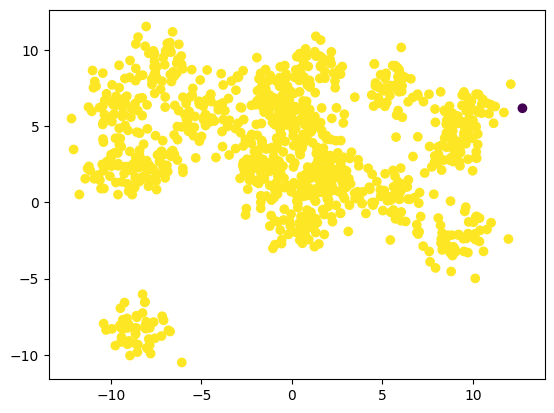

In [51]:
plt.scatter(df["x"], df["y"], c=df["db_pca_label"])

In [52]:
df.describe()

,x,y,label,pca1,db_2d_label,db_pca_label
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,-0.312386,3.250000,9.500000,-1.207923e-16,10.739000,-0.001000
std,6.127646,4.224627,5.769167,6.128314e+00,13.498559,0.031623
min,-12.178429,-10.502736,0.000000,-1.181774e+01,-1.000000,-1.000000
25%,-6.022800,0.992717,4.750000,-5.640544e+00,1.000000,0.000000
50%,0.058191,3.577184,9.500000,3.803679e-01,7.000000,0.000000
75%,4.123734,6.367277,14.250000,4.369244e+00,14.000000,0.000000
max,12.743342,11.536314,19.000000,1.311259e+01,61.000000,0.000000


## Le sorting

In [58]:
df.sort_values(
    by=["x", "y"],
)

,x,y,label,pca1,db_2d_label,db_pca_label
432,-12.178429,5.498447,8,-11.817743,-1,0
162,-12.061768,3.467635,17,-11.742505,-1,0
42,-11.745380,0.513863,17,-11.486395,-1,0
101,-11.421369,1.550457,17,-11.141319,13,0
476,-11.288377,2.226141,17,-10.994582,39,0
...,...,...,...,...,...,...
54,11.241618,6.285160,10,11.613473,9,0
228,11.721941,5.892927,10,12.085702,-1,0
518,11.969479,-2.405094,4,12.164035,-1,0
390,12.098735,7.753093,10,12.500336,-1,0


In [59]:
df["r"] = np.sqrt(df["x"] ** 2 + df["y"] ** 2)

In [60]:
df

,x,y,label,pca1,db_2d_label,db_pca_label,r
0,-8.962963,8.197543,13,-8.547925,0,0,12.146375
1,0.655970,9.191908,6,1.089278,1,0,9.215284
2,4.694698,1.362856,5,4.967575,-1,0,4.888514
3,-1.588530,2.810577,2,-1.284837,1,0,3.228432
4,0.062238,5.937650,11,0.429333,1,0,5.937976
...,...,...,...,...,...,...,...
995,-10.822254,7.619843,8,-10.418606,47,0,13.235678
996,-7.129125,3.157670,12,-6.817205,13,0,7.797134
997,2.859421,2.956028,0,3.165155,1,0,4.112711
998,-0.188880,5.204614,0,0.163324,1,0,5.208040


In [63]:
df[["x", "y", "r"]].sort_values(by=["x"])

,x,y,r
432,-12.178429,5.498447,13.362150
162,-12.061768,3.467635,12.550328
42,-11.745380,0.513863,11.756616
101,-11.421369,1.550457,11.526126
476,-11.288377,2.226141,11.505788
...,...,...,...
54,11.241618,6.285160,12.879333
228,11.721941,5.892927,13.119852
518,11.969479,-2.405094,12.208723
390,12.098735,7.753093,14.369754


In [64]:
df.sort_values(by=["r"])

,x,y,label,pca1,db_2d_label,db_pca_label,r
70,0.275593,0.087688,14,0.523393,1,0,0.289207
366,0.332857,-0.037426,16,0.578095,1,0,0.334954
918,0.331987,-0.339346,14,0.571071,1,0,0.474733
630,0.271357,0.457829,16,0.526704,1,0,0.532205
15,-0.418274,-0.449542,14,-0.181281,6,0,0.614036
...,...,...,...,...,...,...,...
916,-8.498097,10.840477,13,-8.029281,57,0,13.774382
613,-11.017552,8.650353,8,-10.592857,-1,0,14.007679
318,-8.052585,11.536314,13,-7.569677,-1,0,14.068783
609,12.743342,6.172671,10,13.112592,-1,-1,14.159612
